In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
dfx=pd.read_csv("Diabetes_XTrain.csv")
dfx

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23
...,...,...,...,...,...,...,...,...
571,2,111,60,0,0,26.2,0.343,23
572,7,187,68,39,304,37.7,0.254,41
573,2,122,60,18,106,29.8,0.717,22
574,4,154,72,29,126,31.3,0.338,37


In [138]:
dfy=pd.read_csv("Diabetes_YTrain.csv")
dfy

,Outcome
0,1
1,0
2,1
3,1
4,0
...,...
571,0
572,1
573,0
574,0


In [139]:
X=dfx.values
Y=dfy.values

Y=Y.reshape((-1,))

# Normalisation

In [140]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
X_=std.fit_transform(X)
X_

array([[ 0.97457151,  1.52528095,  0.94599501, ...,  0.78036618,
         0.907501  ,  0.59363371],
       [ 1.27524274, -0.31683408,  0.35393439, ..., -0.49918316,
        -0.72639999,  2.11034006],
       [ 0.97457151,  0.85830827,  0.35393439, ...,  0.92800649,
        -0.66698541,  0.8464181 ],
       ...,
       [-0.52878465,  0.06429317, -0.43547977, ..., -0.25311598,
         0.69954996, -0.92307263],
       [ 0.07255781,  1.0806325 ,  0.15658085, ..., -0.06856559,
        -0.42635635,  0.34084932],
       [-0.82945588, -1.01556737,  0.45261116, ...,  0.01755792,
        -0.34614667, -0.33324239]])

# PCA - Finding No of Features

In [141]:
from sklearn.decomposition import PCA

In [142]:
pca=PCA()
Z=pca.fit_transform(X_)
Z.shape

(576, 8)

In [143]:
pca.explained_variance_

array([2.12945554, 1.75957966, 1.061351  , 0.84392934, 0.73481526,
       0.6966238 , 0.41680702, 0.37135142])

In [144]:
pca.explained_variance_ratio_

array([0.26571982, 0.2195656 , 0.13243855, 0.10530802, 0.09169244,
       0.0869268 , 0.05201042, 0.04633834])

In [145]:
cum_var_exp=np.cumsum(pca.explained_variance_ratio_)
cum_var_exp

array([0.26571982, 0.48528543, 0.61772397, 0.723032  , 0.81472444,
       0.90165124, 0.95366166, 1.        ])

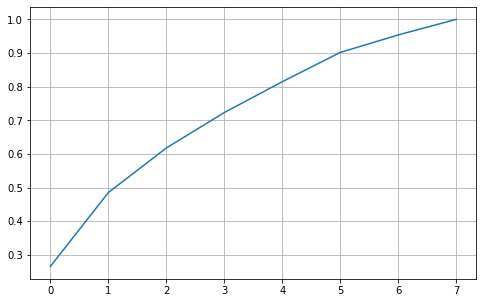

In [146]:
plt.figure(figsize=(8,5))
plt.grid("on")
plt.plot(cum_var_exp)
plt.show()

# Here 6 features are asked to explain 90% of the data

In [147]:
Z_=Z[:,:6]
Z_

array([[ 3.37676664, -0.02086439,  0.75253003, -0.49478261,  0.69504821,
        -0.1207943 ],
       [-0.54337153,  2.83935766, -0.28531357,  0.06105724,  0.36547119,
        -0.09815614],
       [ 0.21374408,  1.94052984, -0.2577961 , -0.38824631, -1.23133903,
         0.44040907],
       ...,
       [-0.30786368, -1.01760785,  0.76204287,  0.24977065, -0.16931518,
        -0.16475928],
       [ 0.84944062,  0.20014572,  0.25557766, -0.9278689 ,  0.00959727,
        -0.09660382],
       [-0.30722447, -0.93243586, -1.03195997,  0.11014255,  0.32484648,
        -0.38605045]])

In [148]:
Z_.shape

(576, 6)

# Split

In [150]:
from sklearn import model_selection as ms

In [151]:
X_train,X_test,Y_train,Y_test=ms.train_test_split(Z_,Y,random_state=0)

In [152]:
X_train.shape,Y_train.shape,X_test.shape, Y_test.shape

((432, 6), (432,), (144, 6), (144,))

### Adding Columns

In [153]:
ones=np.ones((X_train.shape[0],1))
X_train_new=np.hstack((ones,X_train))

In [154]:
X_train_new.shape

(432, 7)

In [155]:
ones=np.ones((X_test.shape[0],1))
X_test_new=np.hstack((ones,X_test))

In [156]:
X_test_new.shape

(144, 7)

### Using Logistic Regression

In [157]:
from sklearn.linear_model import LogisticRegression

In [158]:
alg=LogisticRegression()

In [159]:
alg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [160]:
alg.intercept_

array([-0.7620061])

In [161]:
alg.coef_

array([[ 0.81786796,  0.26348075,  0.50791732, -0.08029013, -0.74000396,
         0.47873939]])

In [162]:
Y_pred_tra=alg.predict(X_train)

In [163]:
alg.score(X_train,Y_train)

0.7685185185185185

In [164]:
alg.score(X_test,Y_test)

0.8263888888888888

In [165]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def hypo(X,theta):
    return sigmoid(np.dot(X,theta))

def error(X,y,theta):
    yp=hypo(X,theta)
    e=np.mean((y*np.log(yp))+((1-y)*np.log(1-yp)))
    return -e

def gradient(X,y,theta):
    M,N=X.shape
    yp=hypo(X,theta)
    grad=np.dot(y-yp,X)
    return -grad/M

def gradient_descent(X,y,lr=0.1,max_itr=500):
    M,N=X.shape
    theta=np.zeros((N,))
    error_list=[]
    
    for i in range(max_itr):
        e=error(X,y,theta)
        error_list.append(e)
        grad=gradient(X,y,theta)
        theta=theta-lr*grad
        
    return theta,error_list

def predict(X,theta):
    yp=hypo(X,theta)
    output=np.zeros(yp.shape)
    output[yp>=0.5]=1
    output=output.astype('int')
    return output

def accuracy(Y,Yp):
    Y=Y.astype('int')
    return np.mean(Y==Yp)*100

In [166]:
theta,error_list=gradient_descent(X_train_new,Y_train)

In [167]:
Y_train_pred=predict(X_train_new,theta)
accuracy(Y_train,Y_train_pred)

76.85185185185185

In [168]:
Y_test_pred=predict(X_test_new,theta)
accuracy(Y_test,Y_test_pred)

82.63888888888889

In [169]:
error_list

[0.6931471805599453,
 0.6808861682388897,
 0.6696701376046064,
 0.6593987311674999,
 0.6499800581373633,
 0.6413305678116928,
 0.6333747109104377,
 0.6260444630434591,
 0.6192787692218318,
 0.6130229537986649,
 0.6072281276139053,
 0.6018506138492747,
 0.5968514061476742,
 0.592195666651301,
 0.5878522674066625,
 0.5837933757086243,
 0.5799940820832181,
 0.5764320684688184,
 0.5730873135330342,
 0.5699418317950515,
 0.56697944318979,
 0.5641855698244228,
 0.5615470568788121,
 0.5590520148475845,
 0.5566896805852496,
 0.5544502948791654,
 0.5523249945273698,
 0.5503057171332129,
 0.5483851170432934,
 0.5465564910485112,
 0.544813712640416,
 0.5431511737675798,
 0.5415637331709512,
 0.540046670494776,
 0.538595645472414,
 0.5372066615759336,
 0.5358760335962882,
 0.5346003586886225,
 0.5333764904761016,
 0.53220151585677,
 0.5310727342023518,
 0.5299876386764688,
 0.5289438994332907,
 0.527939348486795,
 0.5269719660662026,
 0.526039868295272,
 0.5251412960524269,
 0.5242746048855218,
 0

# Testing The Data

In [184]:
xtest=pd.read_csv("Diabetes_Xtest.csv")
xtest

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22
...,...,...,...,...,...,...,...,...
187,10,108,66,0,0,32.4,0.272,42
188,3,130,64,0,0,23.1,0.314,22
189,0,162,76,36,0,49.6,0.364,26
190,12,84,72,31,0,29.7,0.297,46


In [185]:
# Normalisation:

Xtest=std.fit_transform(xtest)
Xtest

array([[-1.18069959,  1.69935671,  1.23607139, ...,  0.58057039,
        -0.41297962,  0.07934011],
       [-0.60533329, -0.92436586, -0.36623149, ...,  0.79289327,
         0.73998714, -0.97730508],
       [-0.60533329, -0.29105352, -0.11972335, ..., -0.52350861,
        -1.12397579, -0.80119755],
       ...,
       [-1.18069959,  1.15651756,  0.37329292, ...,  2.43485691,
        -0.25284534, -0.71314378],
       [ 2.27149819, -1.19578544,  0.12678478, ..., -0.38196002,
        -0.46742527,  1.04793154],
       [-1.18069959, -0.89420813, -4.31036164, ..., -4.58595313,
        -0.59873537, -0.80119755]])

# PCA

In [186]:
pca2=PCA(n_components=6)
Xtest_=pca2.fit_transform(Xtest)
Xtest_.shape

(192, 6)

In [187]:
ones=np.ones((Xtest_.shape[0],1))
xtest_new=np.hstack((ones,Xtest_))

In [188]:
xtest_new.shape

(192, 7)

In [189]:
y_test_pred=predict(xtest_new,theta)

In [190]:
y_test_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [191]:
df_res=pd.DataFrame(y_test_pred,columns=['Outcome'])
df_res

,Outcome
0,0
1,0
2,0
3,1
4,0
...,...
187,1
188,0
189,0
190,1


In [192]:
df_res.to_csv("diabetes_result.csv",index=None)